In [1]:
# ============================================================================
# CELL 1: Setup and Imports
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")
print("📊 Ready for data exploration")


✅ Libraries imported successfully!
📊 Ready for data exploration


In [2]:
# ============================================================================
# CELL 2: Load Data
# ============================================================================

# Load the dataset
data_path = '/app/data/raw/Phelps2016.xlsx'

try:
    df = pd.read_excel(data_path)
    print(f"✅ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {len(df.columns)}")
except FileNotFoundError:
    print("❌ Data file not found. Make sure your Excel file is in data/raw/")
    print("Current working directory contents:")
    print(list(Path('/app/data/raw/').glob('*')))
except Exception as e:
    print(f"❌ Error loading data: {e}")


✅ Data loaded successfully!
Dataset shape: (128, 91)
Columns: 91


In [3]:
# ============================================================================
# CELL 3: Quick Data Overview
# ============================================================================

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 40)
print("COLUMN NAMES")
print("=" * 40)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 40)
print("DATA TYPES")
print("=" * 40)
print(df.dtypes.value_counts())

DATASET OVERVIEW
Shape: 128 rows × 91 columns
Memory usage: 0.21 MB

COLUMN NAMES
 1. sample_ID
 2. sample
 3. site_ID
 4. site
 5. chronology1
 6. chronology2
 7. original_chronology
 8. translucency
 9. colour
10. original_colour
11. macro_type
12. type
13. macro_composition
14. composition
15. original_composition
16. sio
17. nao
18. cao
19. alo
20. ko
21. mgo
22. feo
23. mno
24. tio
25. po
26. cuo
27. coo
28. pbo
29. sbo
30. sno
31. sro
32. bao
33. zno
34. cro
35. zro
36. moo
37. vo
38. Li
39. B
40. Na
41. Mg
42. Al
43. P
44. K
45. Ca
46. Ti
47. V
48. Cr
49. Mn
50. Fe
51. Co
52. Ni
53. Cu
54. Zn
55. Ga
56. As
57. Rb
58. Sr
59. Y
60. Zr
61. Nb
62. Mo
63. Cd
64. In
65. Sn
66. Sb
67. Cs
68. Ba
69. La
70. Ce
71. Pr
72. Nd
73. Sm
74. Eu
75. Gd
76. Tb
77. Dy
78. Ho
79. Er
80. Tm
81. Yb
82. Lu
83. Hf
84. Ta
85. W
86. Pt
87. Au
88. Pb
89. Bi
90. Th
91. U

DATA TYPES
float64    67
object     22
int64       2
Name: count, dtype: int64


In [4]:
# ============================================================================
# CELL 4: First Look at Data
# ============================================================================

print("=" * 60)
print("FIRST 5 ROWS")
print("=" * 60)
display(df.head())

print("\n" + "=" * 60)
print("LAST 5 ROWS")
print("=" * 60)
display(df.tail())

print("\n" + "=" * 60)
print("RANDOM SAMPLE")
print("=" * 60)
display(df.sample(5))


FIRST 5 ROWS


,sample_ID,sample,site_ID,site,chronology1,chronology2,original_chronology,translucency,colour,original_colour,macro_type,type,macro_composition,composition,original_composition,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,Li,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,As,Rb,Sr,Y,Zr,Nb,Mo,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pt,Au,Pb,Bi,Th,U
0,phelps2016_90,RAM 5947 08,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,smokey pale blue,NaN,NaN,egypt_1,egypt_1,N-3,69.864728,14.496476,9.660532,2.636631,0.212505,0.521082,0.987554,NaN,0.287415,0.091603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204.017006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.766654,40.621110,194.041255,NaN,3.43112,7.050818,3.468231,17.060637,3.366861,2.703013,4.357285,196.617150,8.926586,265.745520,4.845577,0.01285,0.107791,NaN,18.407348,0.158813,0.030797,167.917932,8.878543,16.541480,2.091641,8.317145,1.581652,0.374280,1.444857,0.241404,1.479647,0.309358,0.891833,0.120690,1.042985,0.140898,5.900164,0.284891,0.059129,0.001937,bdl,6.197818,0.010017,2.075708,1.201727
1,phelps2016_99,RAM 5947 20,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,cobalt blue,NaN,NaN,egypt_1,egypt_1,N-3,70.518548,12.503187,9.896012,2.012075,0.976668,1.778057,0.793543,NaN,0.194823,0.213082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,295.383646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.580097,45.507714,1107.217816,NaN,12.23085,11.820332,67.279574,46.650019,2.667155,2.99309,6.712272,397.537245,7.735308,205.851635,3.636244,0.914803,0.259541,NaN,32.229106,4.488625,0.049693,161.819249,8.170596,15.711262,1.828348,6.916028,1.535438,0.381274,1.033363,0.206193,1.214839,0.289110,0.786686,0.110870,0.806042,0.110215,4.860550,0.215671,0.122145,0.015401,0.015946,337.487005,0.062638,1.738104,0.962323
2,phelps2016_08,AH 3746 05,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,pale blue,NaN,NaN,egypt_1,egypt_1,N-3,71.232169,12.852251,9.516464,2.827478,0.619012,0.736862,0.755832,NaN,0.169598,0.184722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.030285,267.893297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.518373,33.394416,1615.220450,NaN,5.294652,9.184272,123.938698,35.127970,3.549956,2.612769,8.257851,364.710419,8.760924,148.355691,3.185880,0.522913,bdl,NaN,38.261211,77.001388,bdl,214.479199,7.975384,15.139348,1.859870,7.589613,1.503560,0.314938,1.413000,0.211740,1.346036,0.270256,0.770924,0.115964,0.762477,0.112779,3.263992,0.179061,0.118618,0.012942,0.018502,306.790659,0.017358,1.460000,0.974371
3,phelps2016_10,AH 3746 09,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,70.252829,12.305012,10.634114,3.059662,0.627462,0.783204,0.809936,NaN,0.179708,0.227146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.263923,277.482247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.317224,35.768487,1621.373473,NaN,5.147274,9.365795,124.933714,46.807310,3.556084,3.100774,9.067838,392.368862,9.773685,164.655851,3.386776,0.644668,bdl,NaN,45.235583,70.705931,bdl,227.299352,8.651823,16.192423,2.071317,8.202734,1.639363,0.303017,1.474446,0.242747,1.430890,0.311599,0.782933,0.128886,0.913678,0.142259,3.501249,0.186775,0.141666,bdl,0.019603,294.871124,0.019761,1.632004,1.093745
4,phelps2016_100,RAM 5947 21,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,egypt_1,egypt_1,N-3,68.041447,16.624375,9.434951,2.381466,0.387269,0.536134,0.977467,NaN,0.275471,0.111490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142882,232.146401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.963201,60.792735,220.770326,NaN,3.218177,7.615037,8.528913,19.275766,3.360279,5.670208,7.344182,209.446486,8.675460,280.039856,4.681108,0.464618,0.040237,NaN,14.133251,0.600557,0.094495,173.519035,8.424069,16.236973,2.017020,7.962711,1.589549,0.440029,1.257801,0.227246,1.360782,0.280726,0.841293,0.115741,0.975025,0.144566,6.381845,0.264413,0.139399,bdl,0.010153,8.726815,0


LAST 5 ROWS


,sample_ID,sample,site_ID,site,chronology1,chronology2,original_chronology,translucency,colour,original_colour,macro_type,type,macro_composition,composition,original_composition,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,Li,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,As,Rb,Sr,Y,Zr,Nb,Mo,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pt,Au,Pb,Bi,Th,U
123,phelps2016_62,NS 6362 01,NAH,Nahal Shoval,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,lev_2,lev_2_bet,N-2,75.182471,11.329656,7.597286,3.279388,0.532941,0.586872,0.455476,NaN,0.077220,0.069582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.387917,181.119608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.829423,25.201866,175.234536,NaN,1.819205,5.082924,3.943776,8.963846,4.453960,1.844868,10.156128,459.671283,8.277566,53.632198,1.998575,0.639404,0.008255,0.009279,0.899726,0.443725,0.146685,262.731556,7.725119,14.837000,1.803218,6.845794,1.364370,0.435952,1.238444,0.195072,1.112471,0.246744,0.650876,0.097919,0.643968,0.093293,1.163264,0.105611,0.066813,0.001385,0.015732,12.590025,0.00594,0.940353,0.808132
124,phelps2016_63,NS 6362 02,NAH,Nahal Shoval,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,lev_2,lev_2_bet,N-2,73.608284,11.488538,7.777868,3.466458,0.678603,0.591901,0.726218,NaN,0.096599,0.107428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.130396,139.669539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.401332,27.427023,239.895429,NaN,2.403047,7.053145,41.121120,16.118495,4.567466,2.971281,9.773384,436.734538,8.896817,64.183605,2.434583,0.420573,0.019242,0.219867,67.950973,7.226212,0.153896,257.100215,8.388906,16.316191,1.958819,7.580410,1.557538,0.457195,1.381391,0.215195,1.219977,0.262683,0.672014,0.101394,0.721682,0.095754,1.302480,0.126435,0.076377,bdl,0.011087,7769.029065,0.694868,1.108517,0.739010
125,phelps2016_75,RAM 5947 09,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,lev_2,lev_2_bet,N-2,74.810928,12.038244,7.256228,3.411215,0.398337,0.647971,0.453744,NaN,0.077273,0.078794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116326,205.758557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.179631,16.981152,187.437523,NaN,1.554087,3.212622,2.505484,8.922913,3.895659,2.108875,8.609100,527.819435,8.720366,54.300156,1.984163,0.460616,bdl,NaN,13.306286,0.144934,0.063068,258.736152,7.990706,15.215241,1.855906,7.717783,1.644418,0.456719,1.434218,0.220959,1.340101,0.297161,0.741694,0.119595,0.755819,0.104401,1.327710,0.110557,0.106288,bdl,bdl,6.983860,0.006436,1.052183,0.684613
126,phelps2016_76,RAM 6490 01,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,light bluish green,NaN,NaN,lev_2,lev_2_bet,N-2,73.655283,13.606343,6.722136,3.479237,0.527827,0.526668,0.550015,NaN,0.093255,0.058088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.663051,162.396246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.504069,NaN,193.425236,NaN,2.05576,5.399105,4.983068,8.309969,4.889040,0.528509,10.280025,453.199313,8.953418,64.157643,2.369304,0.427985,0.027425,0.005866,0.907300,bdl,0.072668,264.609558,8.500461,16.428970,2.016741,7.846920,1.532661,0.474491,1.384523,0.229730,1.288780,0.274628,0.734060,0.100576,0.733534,0.104222,1.387085,0.128937,0.072486,0.001099,bdl,11.985255,0.000217,1.131808,0.780829
127,phelps2016_05,AH 3746 12,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,green,green,NaN,NaN,lev_2,lev_2_bet,N-2,73.345222,10.450606,10.956508,3.058740,0.303870,0.434325,0.437650,NaN,0.077479,0.135837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388571,228.023892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.506915,24.901722,184.163790,NaN,bdl,6.091456,16.087696,14.653876,3.011271,1.941289,6.581944,521.967350,9.504495,56.107027,1.924501,0.47149,bdl,NaN,12.321882,3.059238,bdl,224.226957,8.071962,14.549614,1.876837,7.752407,1.551700,0.331247,1.384733,0.208376,1.447475,0.270256,0.756507,0.108752,0.737863,0.103835,1.297576,0.098728,0.070151,0.00


RANDOM SAMPLE


,sample_ID,sample,site_ID,site,chronology1,chronology2,original_chronology,translucency,colour,original_colour,macro_type,type,macro_composition,composition,original_composition,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,Li,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,As,Rb,Sr,Y,Zr,Nb,Mo,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pt,Au,Pb,Bi,Th,U
81,phelps2016_31,JER 3835 04,JER,Jerusalem,7,7,"7th century, Late Byzantine-Early Umayyad",translucent,blue_green,pale greenish blue,NaN,NaN,lev_1,lev_1_apollonia,N-1,69.308601,15.134331,9.687596,3.085411,0.484235,0.573126,0.469108,NaN,0.070983,0.107957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.702333,224.635898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.713930,41.538949,184.496576,NaN,1.685448,6.230760,72.620787,25.118819,4.317828,2.64086,7.749752,505.871896,9.229131,52.278406,1.836078,0.319878,0.025684,0.022777,6.084577,0.046655,0.027175,248.104157,8.231241,15.356222,1.855144,7.326976,1.462398,0.443818,1.234272,0.213359,1.287892,0.268122,0.700241,0.101899,0.662978,0.098482,1.146345,0.094623,0.052414,0.000686,bdl,30.017544,0.010727,0.955247,0.859512
99,phelps2016_73,RAM 5947 14,RAM,Ramla,9,9,"9th century, Mid-Abbasid",translucent,blue_green,greenish blue,NaN,NaN,lev_1,lev_1_apollonia,N-1,72.800937,14.463046,6.500668,3.498246,0.507427,0.495140,0.679685,NaN,0.096347,0.093771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.687538,158.407661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.120596,20.105150,281.951915,NaN,2.653649,5.040995,12.960431,17.507891,4.206206,45.072197,11.373624,417.091175,8.548214,63.997905,2.464921,0.268789,bdl,NaN,13.917783,0.292396,0.102859,253.523533,8.247295,16.253444,2.022903,7.977790,1.680721,0.451321,1.495509,0.219394,1.415850,0.288588,0.786012,0.096469,0.737207,0.117377,1.557764,0.123653,0.066325,bdl,1.095525,77.657023,0.022374,1.313753,2.156029
111,phelps2016_02,AH 3746 01,AHI,Ahihud,8,8,"Early-mid 8th century, Umayyad",translucent,blue_green,greenish blue,NaN,NaN,lev_2,lev_2_bet,N-2,75.910566,11.773123,7.328688,2.820601,0.473936,0.371439,0.304062,NaN,0.052484,0.098040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bdl,231.667116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.621321,19.649570,139.818757,NaN,bdl,3.984905,2.238858,11.104078,3.392159,2.065776,9.339725,425.420478,7.553400,41.853661,1.400579,0.438832,0.091856,NaN,10.286036,5.504853,0.054343,216.899609,6.547160,12.422911,1.534208,6.284269,1.277811,0.354226,1.217439,0.162709,1.168293,0.235884,0.608995,0.085658,0.646251,0.081647,0.939307,0.077422,0.060263,0.012083,bdl,5.075862,0.004265,0.804772,0.841666
48,phelps2016_77,RAM 4740 01,RAM,Ramla,8,8,"Mid-Late 8th century, Early Abbasid",translucent,green,green,NaN,NaN,egypt_1,egypt_1,N-3,72.276490,12.020583,9.514206,2.642212,0.286723,0.676249,1.002961,NaN,0.286005,0.112093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.739948,300.058793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.463319,40.648321,192.745243,NaN,3.444935,7.984544,2.607677,17.785276,3.802737,3.008379,5.266398,209.272099,8.738715,284.924491,4.973006,0.136616,bdl,NaN,12.181032,0.597168,0.040321,174.532854,8.903346,16.931230,2.101093,8.330760,1.741504,0.361199,1.489162,0.218569,1.402385,0.284876,0.831569,0.132554,0.928203,0.135982,6.268887,0.270849,0.060982,bdl,bdl,4.839464,0.010021,2.051766,0.962302
0,phelps2016_90,RAM 5947 08,RAM,Ramla,8,8,"Early-mid 8th century, Umayyad",translucent,blue,smokey pale blue,NaN,NaN,egypt_1,egypt_1,N-3,69.864728,14.496476,9.660532,2.636631,0.212505,0.521082,0.987554,NaN,0.287415,0.091603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204.017006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.766654,40.621110,194.041255,NaN,3.43112,7.050818,3.468231,17.060637,3.366861,2.703013,4.357285,196.617150,8.926586,265.745520,4.845577,0.01285,0.107791,NaN,18.407348,0.158813,0.030797,167.917932,8.878543,16.541480,2.091641,8.317145,1.581652,0.374280,1.444857,0.241404,1.479647,0.309358,0.891833,0.120690,1.042985,0.140898,5.900164,0.284891,0.059129,0.001937,

In [5]:
# ============================================================================
# CELL 5: Data Quality Check
# ============================================================================

print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# Missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
display(missing_summary[missing_summary['Missing_Count'] > 0])

if missing_summary['Missing_Count'].sum() == 0:
    print("✅ No missing values found!")

# Duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print("⚠️ Found duplicate rows - consider investigating")
else:
    print("✅ No duplicate rows found")


DATA QUALITY ASSESSMENT
Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
10,macro_type,128,100.00000
25,cuo,128,100.00000
11,type,128,100.00000
22,mno,128,100.00000
26,coo,128,100.00000
32,zno,128,100.00000
31,bao,128,100.00000
30,sro,128,100.00000
29,sno,128,100.00000
49,Fe,128,100.00000



Duplicate rows: 0
✅ No duplicate rows found


In [6]:
# ============================================================================
# CELL 6: Descriptive Statistics
# ============================================================================

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("=" * 60)
print("VARIABLE TYPES")
print("=" * 60)
print(f"Numerical variables ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical variables ({len(categorical_cols)}): {categorical_cols}")

if numerical_cols:
    print("\n" + "=" * 60)
    print("NUMERICAL STATISTICS")
    print("=" * 60)
    display(df[numerical_cols].describe())

if categorical_cols:
    print("\n" + "=" * 60)
    print("CATEGORICAL STATISTICS")
    print("=" * 60)
    for col in categorical_cols[:5]:  # Show first 5 categorical columns
        print(f"\n--- {col} ---")
        print(f"Unique values: {df[col].nunique()}")
        if df[col].nunique() <= 20:  # Only show value counts if not too many unique values
            print("Value counts:")
            display(df[col].value_counts().head(10))
        else:
            print("Too many unique values to display (showing first 10 most common):")
            display(df[col].value_counts().head(10))


VARIABLE TYPES
Numerical variables (69): ['chronology1', 'chronology2', 'macro_type', 'type', 'sio', 'nao', 'cao', 'alo', 'ko', 'mgo', 'feo', 'mno', 'tio', 'po', 'cuo', 'coo', 'pbo', 'sbo', 'sno', 'sro', 'bao', 'zno', 'cro', 'zro', 'moo', 'vo', 'B', 'Na', 'Mg', 'Al', 'P', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Ni', 'Cu', 'Zn', 'Ga', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Sn', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Pb', 'Th', 'U']
Categorical variables (22): ['sample_ID', 'sample', 'site_ID', 'site', 'original_chronology', 'translucency', 'colour', 'original_colour', 'macro_composition', 'composition', 'original_composition', 'Li', 'Co', 'As', 'Mo', 'Cd', 'In', 'Sb', 'Cs', 'Pt', 'Au', 'Bi']

NUMERICAL STATISTICS


,chronology1,chronology2,macro_type,type,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Ga,Rb,Sr,Y,Zr,Nb,Sn,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pb,Th,U
count,128.000000,128.000000,0.0,0.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,0.0,128.000000,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.000000,105.000000,128.000000,0.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,7.835938,7.906250,NaN,NaN,71.329466,14.001238,8.646276,2.925363,0.468677,0.568144,0.704818,NaN,0.166099,0.096153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.062396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.109855,42.666079,542.343960,NaN,6.672536,43.631729,33.775912,4.036895,7.932395,367.635536,8.785807,139.166495,3.217982,11.434046,222.540361,8.418108,16.220598,1.949995,7.654014,1.533178,0.405818,1.311554,0.217484,1.306132,0.276276,0.757617,0.108695,0.765963,0.115010,2.940222,0.172193,0.080831,178.618883,1.395330,1.077350
std,0.750615,0.942751,NaN,NaN,1.861210,1.302160,1.471420,0.436744,0.211120,0.145867,0.292921,NaN,0.102232,0.038430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.714720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010429,35.393530,1572.748466,NaN,2.434503,157.720239,113.056441,0.695967,2.937292,142.902731,0.845301,93.414921,1.332842,17.480130,44.190962,0.778095,1.690890,0.171556,0.721405,0.160666,0.061274,0.163039,0.024087,0.150195,0.028527,0.087487,0.014970,0.130034,0.020533,1.949789,0.073692,0.036864,903.904742,0.430105,0.348010
min,7.000000,7.000000,NaN,NaN,66.299834,10.450606,2.669454,1.876955,0.168072,0.354901,0.304062,NaN,0.052484,0.044093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.785700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.621321,0.000000,125.460113,NaN,3.212622,1.334579,6.378336,2.525815,3.332977,157.083542,6.680291,39.686636,1.400579,0.461807,131.071355,6.412918,12.422911,1.534208,6.185729,1.218790,0.283608,0.976995,0.162709,0.981655,0.211698,0.556390,0.079702,0.562914,0.078870,0.939307,0.077422,0.041888,1.788717,0.773791,0.587405
25%,7.000000,7.000000,NaN,NaN,70.038887,13.184682,7.585223,2.623537,0.284460,0.494460,0.464012,NaN,0.079288,0.065323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.419360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.250522,22.222512,184.250349,NaN,5.037985,3.626489,9.903804,3.553233,4.882517,209.402889,8.323027,59.278419,2.056826,0.849625,179.409180,8.010356,15.210728,1.852390,7.314050,1.459091,0.363894,1.224829,0.203938,1.215967,0.259867,0.701887,0.098210,0.665627,0.100061,1.286088,0.108520,0.063421,4.923609,1.021579,0.838315
50%,8.000000,8.000000,NaN,NaN,71.165687,14.025627,9.084870,3.002418,0.469417,0.542041,0.574912,NaN,0.101185,0.087148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.523216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.114046,35.768487,195.533524,NaN,6.152816,5.083046,16.006168,4.010718,8.289593,425.721089,8.753160,71.191118,2.521006,7.093702,231.541251,8.412498,16.184559,1.956403,7.603784,1.522283,0.414226,1.296215,0.217253,1.288336,0.273891,0.751203,0.107027,0.735886,0.108988,1.512637,0.126581,0.072489,8.413151,1.177832,1.045804
75%,8.000000,8.000000,NaN,NaN,72.386521,14.774847,9.580920,3.252537,0.585337,0.610415,0.933369,NaN,0.267977,0.114448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277.541225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.604725,42.658027,237.951688,NaN,7.772317,21.717677,19.001502,4.358943,10.285037,487.838233,9.236276,236.165340,4.555568,14.159001,258.999829,8.842259,17.074432,2.042041,7.959434,1.590798,0.453234,1.413943,0.227296,1.362087,0.289208,0.793620,0.116685,0.858009,0.131912,5.001490,0.250233,0.085134,37.048464,1.7916


CATEGORICAL STATISTICS

--- sample_ID ---
Unique values: 128
Too many unique values to display (showing first 10 most common):


sample_ID
phelps2016_90     1
phelps2016_99     1
phelps2016_08     1
phelps2016_10     1
phelps2016_100    1
phelps2016_101    1
phelps2016_102    1
phelps2016_103    1
phelps2016_107    1
phelps2016_11     1
Name: count, dtype: int64


--- sample ---
Unique values: 128
Too many unique values to display (showing first 10 most common):


sample
RAM 5947 08    1
RAM 5947 20    1
AH 3746 05     1
AH 3746 09     1
RAM 5947 21    1
RAM 5947 23    1
RAM 5947 24    1
RAM 5947 25    1
RAM 6490 10    1
AH 3746 11     1
Name: count, dtype: int64


--- site_ID ---
Unique values: 11
Value counts:


site_ID
RAM     39
JER     34
AHI     12
SEP     12
NAH      7
TIB      6
ASH      5
HAB      5
TEL      4
CAE      3
Name: count, dtype: int64


--- site ---
Unique values: 11
Value counts:


site
Ramla           39
Jerusalem       34
 Ahihud         12
Sepphoris       12
Nahal Shoval     7
Tel Rosh         6
Ashdod-Yam       5
Ha-Bonim         5
Tiberias         4
Caesarea         3
Name: count, dtype: int64


--- original_chronology ---
Unique values: 6
Value counts:


original_chronology
Early-mid 8th century, Umayyad                   50
7th century, Late Byzantine-Early Umayyad        45
9th century, Mid-Abbasid                         15
Mid-Late 8th century, Early Abbasid              12
9th-early 11th century                            3
10th-early 11th century, Late Abbasid-Fatimid     3
Name: count, dtype: int64

Creating distribution plots for numerical variables...
Plotting 65 numerical variables (excluded: ['chronology1', 'chronology2', 'macro_type', 'type'])


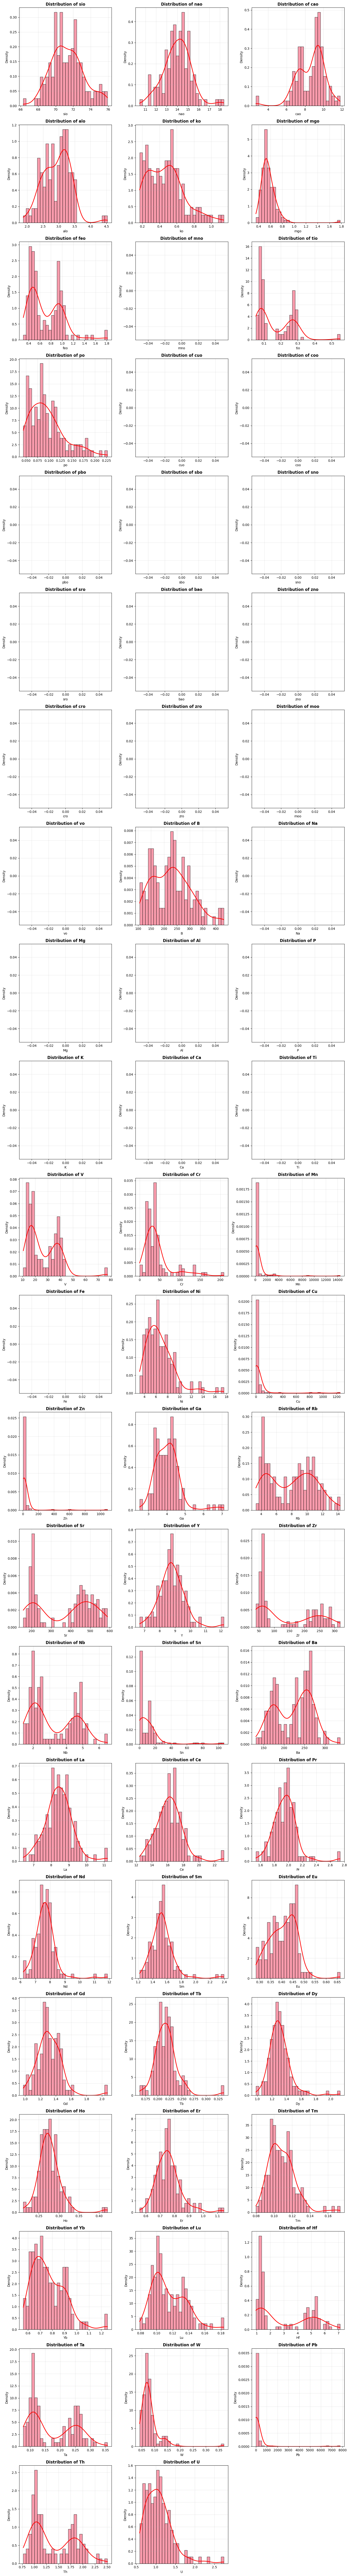

In [7]:
# ============================================================================
# CELL 7: Visualizations - Distribution Plots
# ============================================================================

if numerical_cols:
    print("Creating distribution plots for numerical variables...")
    
    # Exclude specific columns from visualization
    excluded_cols = ['chronology1', 'chronology2', 'macro_type', 'type']
    plot_cols = [col for col in numerical_cols if col.lower() not in [x.lower() for x in excluded_cols]]
    
    print(f"Plotting {len(plot_cols)} numerical variables (excluded: {excluded_cols})")
    
    if plot_cols:
        # Calculate grid size
        n_cols = min(3, len(plot_cols))
        n_rows = (len(plot_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
        
        # Handle single subplot case
        if len(plot_cols) == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes if len(plot_cols) > 1 else [axes]
        else:
            axes = axes.flatten()
        
        for i, col in enumerate(plot_cols):
            if i < len(axes):
                # Create histogram with KDE
                axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black', density=True)
                
                # Add KDE curve
                from scipy import stats
                try:
                    kde_data = df[col].dropna()
                    if len(kde_data) > 1:
                        density = stats.gaussian_kde(kde_data)
                        xs = np.linspace(kde_data.min(), kde_data.max(), 100)
                        axes[i].plot(xs, density(xs), 'r-', linewidth=2)
                except:
                    pass
                
                axes[i].set_title(f'Distribution of {col}', fontweight='bold')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Density')
                axes[i].grid(True, alpha=0.3)
        
        # Hide empty subplots
        for j in range(len(plot_cols), len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No numerical columns remaining after exclusions")

Creating box plots for outlier detection...


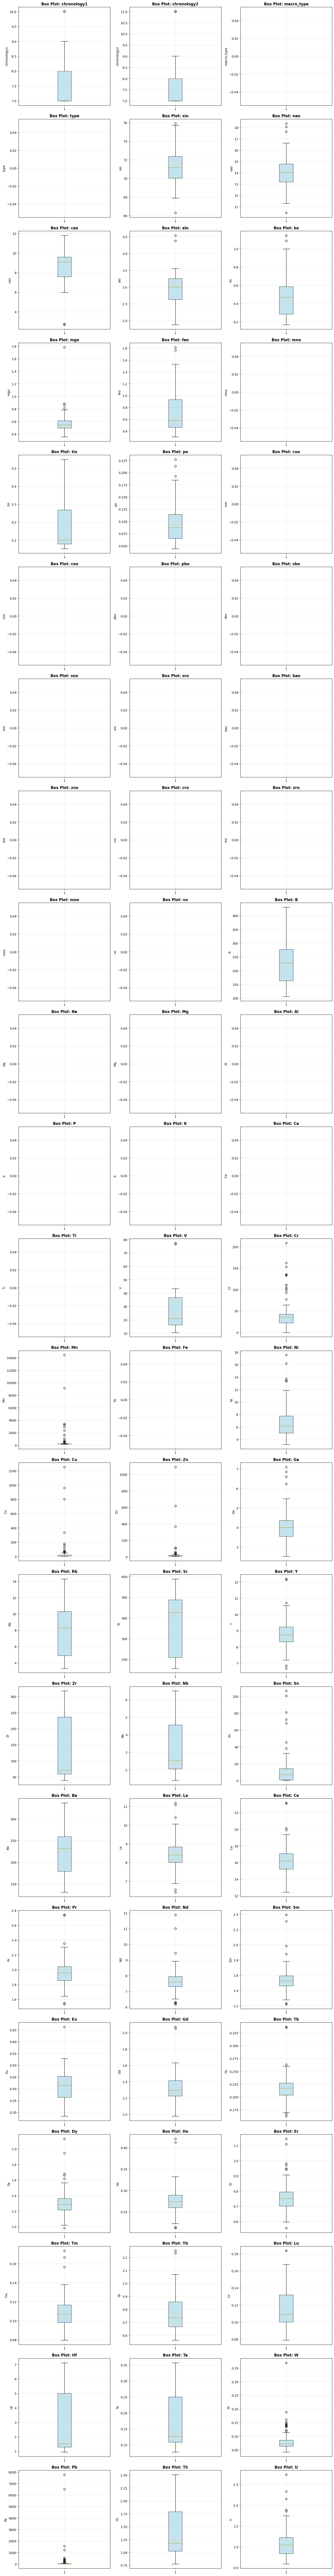

In [8]:
# ============================================================================
# CELL 8: Box Plots for Outlier Detection
# ============================================================================

if numerical_cols:
    print("Creating box plots for outlier detection...")
    
    # Calculate grid size
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))
    
    # Handle single subplot case
    if len(numerical_cols) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if len(numerical_cols) > 1 else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            bp = axes[i].boxplot(df[col].dropna(), patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][0].set_alpha(0.7)
            
            axes[i].set_title(f'Box Plot: {col}', fontweight='bold')
            axes[i].set_ylabel(col)
            axes[i].grid(True, alpha=0.3)
    
    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


CORRELATION ANALYSIS
Analyzing correlations for 65 variables (excluded: ['chronology1', 'chronology2', 'macro_type', 'type'])
Correlation Matrix:


,sio,nao,cao,alo,ko,mgo,feo,mno,tio,po,cuo,coo,pbo,sbo,sno,sro,bao,zno,cro,zro,moo,vo,B,Na,Mg,Al,P,K,Ca,Ti,V,Cr,Mn,Fe,Ni,Cu,Zn,Ga,Rb,Sr,Y,Zr,Nb,Sn,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Pb,Th,U
sio,1.000,-0.603,-0.619,0.340,0.109,-0.257,-0.436,NaN,-0.415,-0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428,0.014,-0.257,NaN,-0.474,-0.276,-0.255,-0.061,0.330,0.305,-0.137,-0.455,-0.427,-0.135,0.292,-0.145,-0.132,-0.258,-0.250,-0.274,0.092,-0.230,-0.257,-0.239,-0.296,-0.394,-0.400,-0.418,-0.488,-0.450,-0.438,-0.146,0.118,-0.437,-0.346
nao,-0.603,1.000,-0.157,-0.124,-0.037,-0.066,0.196,NaN,0.242,-0.179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.228,0.151,0.040,NaN,0.106,0.024,0.072,0.094,-0.039,-0.194,0.065,0.137,0.196,-0.117,-0.178,0.116,0.179,0.151,0.131,0.098,0.129,0.007,0.185,0.088,0.155,0.145,0.066,0.124,0.182,0.128,0.181,-0.048,-0.231,0.167,0.348
cao,-0.619,-0.157,1.000,-0.531,-0.224,0.127,0.154,NaN,0.150,0.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,-0.214,0.139,NaN,0.222,0.178,0.138,-0.277,-0.467,-0.225,-0.166,0.373,0.243,0.199,-0.323,-0.153,-0.231,-0.086,-0.110,-0.050,-0.419,-0.012,-0.145,-0.057,-0.066,0.120,0.190,0.208,0.257,0.378,0.283,0.111,-0.035,0.279,0.093
alo,0.340,-0.124,-0.531,1.000,0.500,0.063,-0.296,NaN,-0.397,-0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.282,0.033,-0.168,NaN,-0.174,-0.051,-0.123,0.488,0.727,0.692,0.689,-0.599,-0.486,0.039,0.788,0.335,0.304,0.296,0.446,0.394,0.638,0.484,0.546,0.434,0.445,0.201,0.030,-0.159,-0.191,-0.588,-0.499,-0.074,0.123,-0.455,-0.029
ko,0.109,-0.037,-0.224,0.500,1.000,0.290,-0.562,NaN,-0.637,0.401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.569,-0.155,-0.061,NaN,-0.260,-0.001,-0.095,0.147,0.879,0.753,0.236,-0.680,-0.677,0.063,0.634,-0.102,-0.116,-0.234,-0.139,-0.102,0.283,-0.101,0.036,-0.075,-0.027,-0.250,-0.391,-0.516,-0.538,-0.682,-0.688,-0.023,0.122,-0.662,-0.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ta,-0.438,0.181,0.283,-0.499,-0.688,0.171,0.914,NaN,0.965,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.936,0.231,0.170,NaN,0.655,0.102,0.161,-0.022,-0.778,-0.900,-0.013,0.967,0.983,0.071,-0.747,0.358,0.381,0.557,0.472,0.464,-0.192,0.371,0.281,0.388,0.372,0.579,0.743,0.874,0.891,0.975,1.000,0.275,-0.056,0.986,0.283
W,-0.146,-0.048,0.111,-0.074,-0.023,0.217,0.256,NaN,0.235,0.264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.277,-0.028,0.323,NaN,0.283,0.082,0.073,-0.017,-0.074,-0.171,0.118,0.261,0.250,0.259,-0.068,0.160,0.117,0.186,0.197,0.222,-0.131,0.155,0.169,0.206,0.245,0.250,0.278,0.332,0.318,0.274,0.275,1.000,0.064,0.290,0.014
Pb,0.118,-0.231,-0.035,0.123,0.122,0.049,0.025,NaN,-0.070,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.051,0.128,-0.005,NaN,0.066,0.063,0.005,0.083,0.055,0.050,0.064,-0.079,-0.052,0.539,0.080,0.073,0.045,0.030,0.020,-0.006,0.109,0.039,-0.006,-0.018,-0.021,-0.039,-0.019,-0.050,-0.075,-0.081,-0.056,0.064,1.000,-0.047,-0.081
Th,-0.437,0.167,0.279,-0.455,-0.662,0.203,0.910,NaN,0.957,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.937,0.248,0.174,NaN,0.660,0.102,0.158,-0.010,-0.751,-0.862,0.062,0.962,0.973,0.100,-0.711,0.427,0.435,0.613,0.529,0.516,-0.144,0.406,0.332,0.442,0.430,0.632,0.773,0.895,0.914,0.972,0.986,0.290,-0.047,1.000,0.338


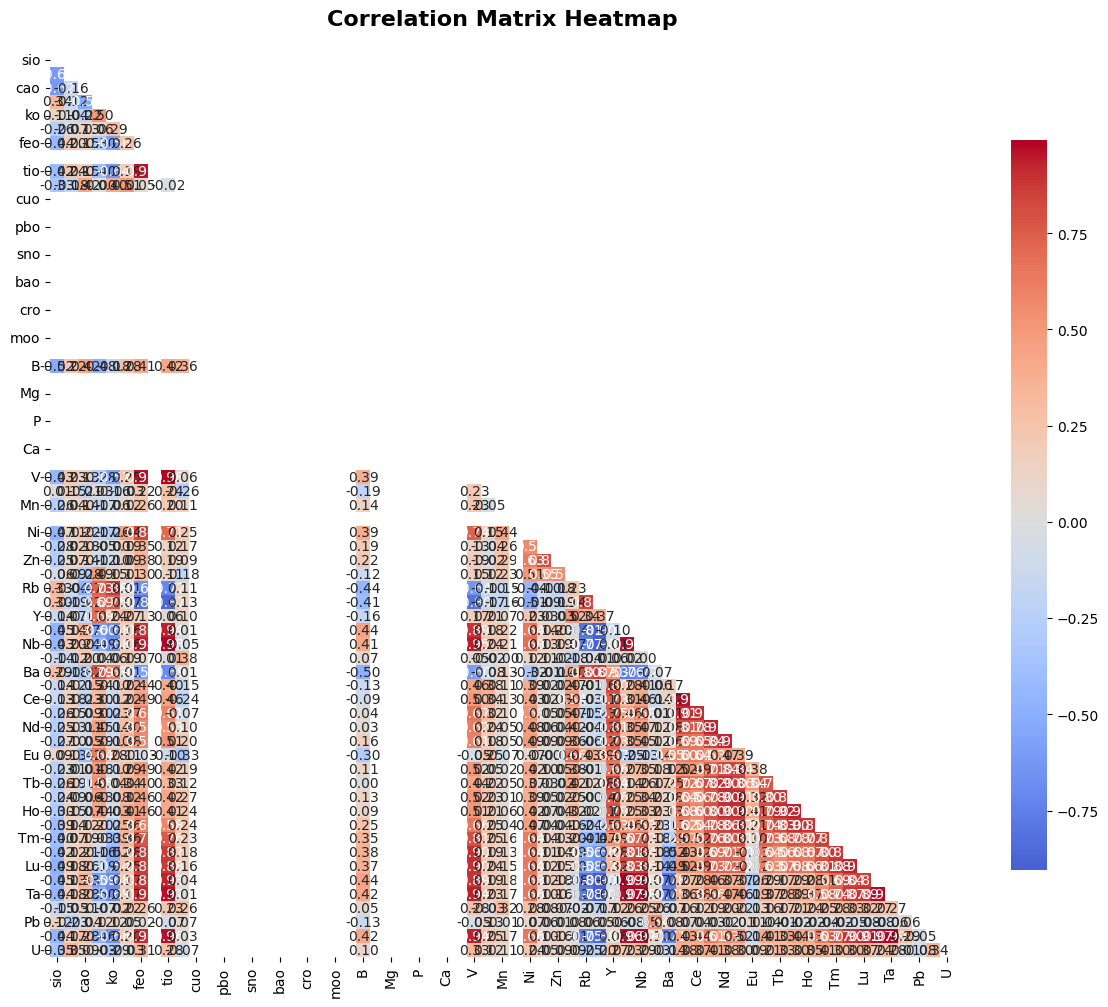


Highly Correlated Pairs (|r| > 0.7):
  alo ↔ Rb: 0.727
  alo ↔ Ba: 0.788
  ko ↔ Rb: 0.879
  ko ↔ Sr: 0.753
  feo ↔ tio: 0.955
  feo ↔ V: 0.959
  feo ↔ Ni: 0.837
  feo ↔ Sr: -0.800
  feo ↔ Zr: 0.877
  feo ↔ Nb: 0.936
  feo ↔ Tm: 0.777
  feo ↔ Yb: 0.857
  feo ↔ Lu: 0.864
  feo ↔ Hf: 0.869
  feo ↔ Ta: 0.914
  feo ↔ Th: 0.910
  tio ↔ V: 0.981
  tio ↔ Ni: 0.709
  tio ↔ Rb: -0.718
  tio ↔ Sr: -0.872
  tio ↔ Zr: 0.937
  tio ↔ Nb: 0.980
  tio ↔ Tm: 0.761
  tio ↔ Yb: 0.870
  tio ↔ Lu: 0.877
  tio ↔ Hf: 0.931
  tio ↔ Ta: 0.965
  tio ↔ Th: 0.957
  V ↔ Ni: 0.740
  V ↔ Sr: -0.800
  V ↔ Zr: 0.893
  V ↔ Nb: 0.947
  V ↔ Tm: 0.812
  V ↔ Yb: 0.898
  V ↔ Lu: 0.903
  V ↔ Hf: 0.891
  V ↔ Ta: 0.936
  V ↔ Th: 0.937
  Cu ↔ Zn: 0.804
  Rb ↔ Sr: 0.838
  Rb ↔ Zr: -0.805
  Rb ↔ Nb: -0.766
  Rb ↔ Ba: 0.795
  Rb ↔ Hf: -0.802
  Rb ↔ Ta: -0.778
  Rb ↔ Th: -0.751
  Sr ↔ Zr: -0.904
  Sr ↔ Nb: -0.899
  Sr ↔ Ba: 0.870
  Sr ↔ Hf: -0.898
  Sr ↔ Ta: -0.900
  Sr ↔ Th: -0.862
  Y ↔ La: 0.803
  Y ↔ Ce: 0.725
  Y ↔ Pr: 0.749
 

In [9]:
# ============================================================================
# CELL 9: Correlation Analysis
# ============================================================================

if len(numerical_cols) > 1:
    print("=" * 60)
    print("CORRELATION ANALYSIS")
    print("=" * 60)
    
    # Exclude specific columns from correlation analysis
    excluded_cols = ['chronology1', 'chronology2', 'macro_type', 'type']
    corr_cols = [col for col in numerical_cols if col.lower() not in [x.lower() for x in excluded_cols]]
    
    print(f"Analyzing correlations for {len(corr_cols)} variables (excluded: {excluded_cols})")
    
    if len(corr_cols) > 1:
        # Calculate correlation matrix
        correlation_matrix = df[corr_cols].corr()
        
        print("Correlation Matrix:")
        display(correlation_matrix.round(3))
        
        # Create correlation heatmap
        plt.figure(figsize=(12, 10))
        
        # Create mask for upper triangle
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # Generate heatmap
        sns.heatmap(correlation_matrix, 
                    mask=mask,
                    annot=True, 
                    cmap='coolwarm', 
                    center=0, 
                    square=True, 
                    fmt='.2f',
                    cbar_kws={"shrink": .8})
        
        plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
        
        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_value = correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.7:  # Threshold for high correlation
                    high_corr_pairs.append((
                        correlation_matrix.columns[i], 
                        correlation_matrix.columns[j], 
                        corr_value
                    ))
        
        if high_corr_pairs:
            print("\nHighly Correlated Pairs (|r| > 0.7):")
            for col1, col2, corr in high_corr_pairs:
                print(f"  {col1} ↔ {col2}: {corr:.3f}")
        else:
            print("\nNo highly correlated pairs found (|r| > 0.7)")
    else:
        print("Not enough numerical columns remaining after exclusions for correlation analysis")

Creating CaO/Al2O3 vs. Na2O/SiO2 biplot...
Checking data availability:
cao: 128 values
alo: 128 values
nao: 128 values
sio: 128 values
Data points with both ratios and group labels: 128
Groups found: ['N-3' 'N-3 (Co)' 'N-3 (Mn)' 'N-4' 'N-1' 'N-2']


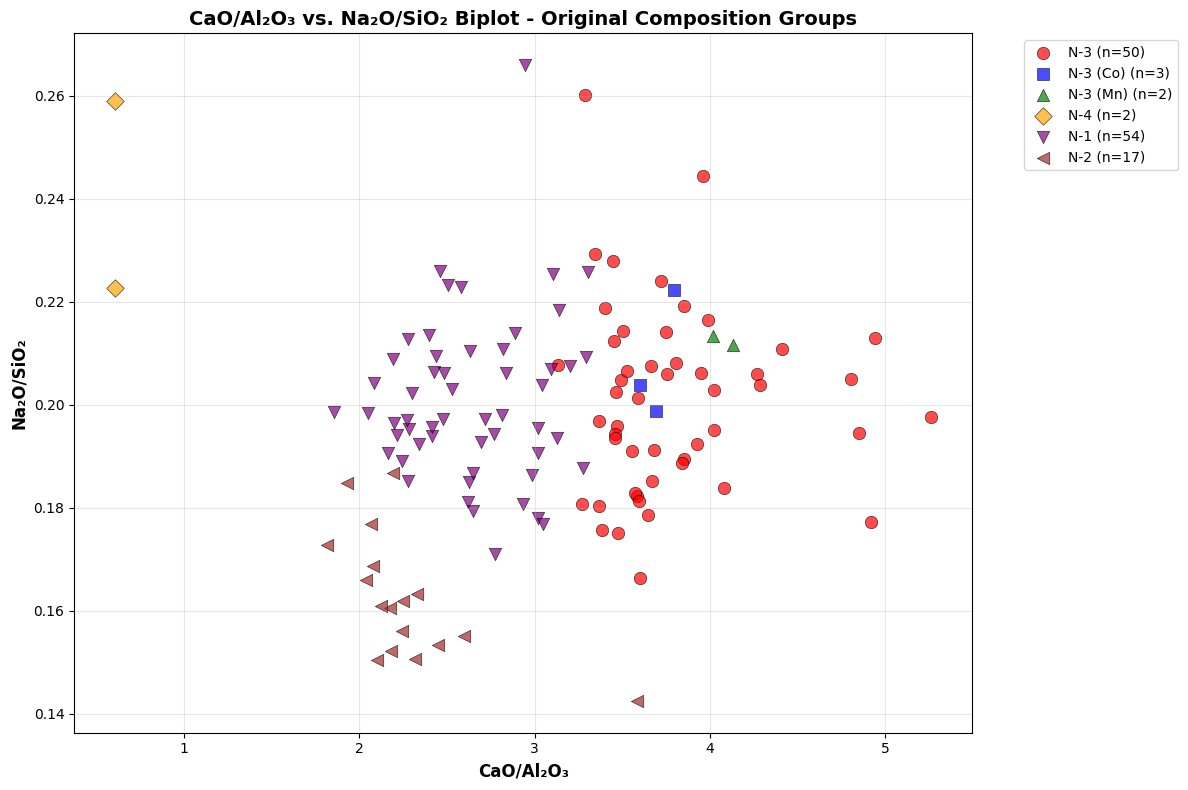


Group Statistics:

N-3 (n=50):
  CaO/Al₂O₃: 3.795 ± 0.479
  CaO/Al₂O₃ range: 3.135 - 5.262
  Na₂O/SiO₂: 0.201 ± 0.018
  Na₂O/SiO₂ range: 0.166 - 0.260

N-3 (Co) (n=3):
  CaO/Al₂O₃: 3.697 ± 0.096
  CaO/Al₂O₃ range: 3.602 - 3.795
  Na₂O/SiO₂: 0.208 ± 0.012
  Na₂O/SiO₂ range: 0.199 - 0.222

N-3 (Mn) (n=2):
  CaO/Al₂O₃: 4.075 ± 0.079
  CaO/Al₂O₃ range: 4.019 - 4.131
  Na₂O/SiO₂: 0.212 ± 0.001
  Na₂O/SiO₂ range: 0.212 - 0.213

N-4 (n=2):
  CaO/Al₂O₃: 0.609 ± 0.001
  CaO/Al₂O₃ range: 0.608 - 0.610
  Na₂O/SiO₂: 0.241 ± 0.026
  Na₂O/SiO₂ range: 0.223 - 0.259

N-1 (n=54):
  CaO/Al₂O₃: 2.647 ± 0.365
  CaO/Al₂O₃ range: 1.858 - 3.306
  Na₂O/SiO₂: 0.201 ± 0.016
  Na₂O/SiO₂ range: 0.171 - 0.266

N-2 (n=17):
  CaO/Al₂O₃: 2.264 ± 0.386
  CaO/Al₂O₃ range: 1.817 - 3.582
  Na₂O/SiO₂: 0.163 ± 0.012
  Na₂O/SiO₂ range: 0.142 - 0.187

Overall Statistics:
Total samples: 128
CaO/Al₂O₃ range: 0.608 - 5.262
Na₂O/SiO₂ range: 0.142 - 0.266

Group Comparison:
CaO/Al₂O₃ ANOVA: F=73.287, p=4.312e-35
Na₂O/SiO₂ ANOVA:

In [10]:
# ============================================================================
# CELL 10: Categorical Data Visualisation
# ============================================================================
# Create CaO/Al2O3 vs. Na2O/SiO2 biplot with predefined groups
import matplotlib.pyplot as plt
import numpy as np

print("Creating CaO/Al2O3 vs. Na2O/SiO2 biplot...")

# Check data availability for all required oxides
required_oxides = ['cao', 'alo', 'nao', 'sio']
print("Checking data availability:")
for oxide in required_oxides:
    count = df[oxide].notna().sum()
    print(f"{oxide}: {count} values")

# Calculate the ratios
df_ratios = df.copy()
df_ratios['cao_alo_ratio'] = df['cao'] / df['alo']
df_ratios['nao_sio_ratio'] = df['nao'] / df['sio']

# Get clean data with both ratios and group labels
mask = df_ratios[['cao_alo_ratio', 'nao_sio_ratio', 'original_composition']].notna().all(axis=1)
clean_data = df_ratios[mask].copy()

print(f"Data points with both ratios and group labels: {len(clean_data)}")

if len(clean_data) > 0:
    # Get unique groups
    groups = clean_data['original_composition'].unique()
    print(f"Groups found: {groups}")
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p']
    
    for i, group in enumerate(groups):
        group_data = clean_data[clean_data['original_composition'] == group]
        
        plt.scatter(group_data['cao_alo_ratio'], 
                   group_data['nao_sio_ratio'], 
                   c=colors[i % len(colors)], 
                   marker=markers[i % len(markers)],
                   label=f'{group} (n={len(group_data)})', 
                   alpha=0.7, 
                   s=80,
                   edgecolors='black',
                   linewidth=0.5)
    
    plt.xlabel('CaO/Al₂O₃', fontsize=12, fontweight='bold')
    plt.ylabel('Na₂O/SiO₂', fontsize=12, fontweight='bold')
    plt.title('CaO/Al₂O₃ vs. Na₂O/SiO₂ Biplot - Original Composition Groups', 
              fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print detailed group statistics
    print("\nGroup Statistics:")
    print("=" * 70)
    
    for group in groups:
        group_data = clean_data[clean_data['original_composition'] == group]
        print(f"\n{group} (n={len(group_data)}):")
        print(f"  CaO/Al₂O₃: {group_data['cao_alo_ratio'].mean():.3f} ± {group_data['cao_alo_ratio'].std():.3f}")
        print(f"  CaO/Al₂O₃ range: {group_data['cao_alo_ratio'].min():.3f} - {group_data['cao_alo_ratio'].max():.3f}")
        print(f"  Na₂O/SiO₂: {group_data['nao_sio_ratio'].mean():.3f} ± {group_data['nao_sio_ratio'].std():.3f}")
        print(f"  Na₂O/SiO₂ range: {group_data['nao_sio_ratio'].min():.3f} - {group_data['nao_sio_ratio'].max():.3f}")
    
    # Overall statistics
    print(f"\nOverall Statistics:")
    print(f"Total samples: {len(clean_data)}")
    print(f"CaO/Al₂O₃ range: {clean_data['cao_alo_ratio'].min():.3f} - {clean_data['cao_alo_ratio'].max():.3f}")
    print(f"Na₂O/SiO₂ range: {clean_data['nao_sio_ratio'].min():.3f} - {clean_data['nao_sio_ratio'].max():.3f}")
    
    # Statistical analysis between groups
    print(f"\nGroup Comparison:")
    from scipy import stats
    
    # ANOVA for both ratios
    cao_alo_groups = [clean_data[clean_data['original_composition'] == group]['cao_alo_ratio'].values 
                      for group in groups]
    nao_sio_groups = [clean_data[clean_data['original_composition'] == group]['nao_sio_ratio'].values 
                      for group in groups]
    
    cao_alo_anova = stats.f_oneway(*cao_alo_groups)
    nao_sio_anova = stats.f_oneway(*nao_sio_groups)
    
    print(f"CaO/Al₂O₃ ANOVA: F={cao_alo_anova.statistic:.3f}, p={cao_alo_anova.pvalue:.3e}")
    print(f"Na₂O/SiO₂ ANOVA: F={nao_sio_anova.statistic:.3f}, p={nao_sio_anova.pvalue:.3e}")

else:
    print("No data available for creating the ratio plot")
    
    # Show what data is missing
    print("\nTroubleshooting:")
    print(f"Rows with cao data: {df['cao'].notna().sum()}")
    print(f"Rows with alo data: {df['alo'].notna().sum()}")
    print(f"Rows with nao data: {df['nao'].notna().sum()}")
    print(f"Rows with sio data: {df['sio'].notna().sum()}")
    print(f"Rows with composition data: {df['original_composition'].notna().sum()}")


In [11]:
# ============================================================================
# CELL 11: AI Analysis (if Ollama is available)
# ============================================================================

try:
    # Test Ollama integration
    from src.ollama_helper import setup_ollama
    
    print("🤖 Connecting to AI assistant...")
    ai = setup_ollama("llama2")
    
    # Create dataset summary for AI
    summary = f"""
    Dataset Analysis Summary:
    - Shape: {df.shape[0]} rows, {df.shape[1]} columns
    - Numerical variables: {len(numerical_cols)} ({', '.join(numerical_cols[:5])})
    - Categorical variables: {len(categorical_cols)} ({', '.join(categorical_cols[:3])})
    - Missing values: {df.isnull().sum().sum()} total
    - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB
    
    This appears to be research data from Phelps et al. 2016.
    """
    
    print("🧠 Getting AI analysis suggestions...")
    response = ai.ask(f"""
    Based on this dataset summary, what are the most important next steps for analysis?
    
    {summary}
    
    Please provide 3-5 specific, actionable recommendations for data analysis.
    """)
    
    if response and response != "Error: Could not get response":
        print("=" * 60)
        print("🤖 AI ANALYSIS SUGGESTIONS")
        print("=" * 60)
        print(response)
    else:
        print("⚠️ AI assistant not available - continuing without AI suggestions")
        
except ImportError:
    print("⚠️ Ollama helper not found - run this in Docker for AI features")
except Exception as e:
    print(f"⚠️ AI integration error: {e}")

🤖 Connecting to AI assistant...
📥 Pulling llama2 model...
✅ llama2 model ready!
🧠 Getting AI analysis suggestions...
Error asking Ollama: HTTPConnectionPool(host='ollama', port=11434): Read timed out. (read timeout=60)
⚠️ AI assistant not available - continuing without AI suggestions


In [12]:
# ============================================================================
# CELL 12: Summary and Next Steps
# ============================================================================

print("\n" + "=" * 60)
print("📊 EXPLORATION SUMMARY")
print("=" * 60)

print(f"✅ Dataset successfully loaded and explored")
print(f"📈 Found {len(numerical_cols)} numerical and {len(categorical_cols)} categorical variables")
print(f"🔍 Data quality: {df.isnull().sum().sum()} missing values, {df.duplicated().sum()} duplicates")

if len(numerical_cols) > 1:
    high_corr_count = len([1 for i in range(len(correlation_matrix.columns)) 
                          for j in range(i+1, len(correlation_matrix.columns)) 
                          if abs(correlation_matrix.iloc[i, j]) > 0.7])
    print(f"🔗 Found {high_corr_count} highly correlated variable pairs")

print("\n" + "=" * 40)
print("🎯 RECOMMENDED NEXT STEPS")
print("=" * 40)
print("1. 🧹 Handle missing values and outliers")
print("2. 🔬 Perform statistical tests and hypothesis testing") 
print("3. 🤖 Use AI assistant for advanced analysis suggestions")
print("4. 📊 Create publication-ready visualizations")
print("5. 🔍 Investigate interesting patterns found in the data")
print("6. 📝 Document findings and create analysis report")

print(f"\n🎉 Data exploration complete! Ready for advanced analysis.")
print(f"💡 Tip: Use the AI assistant to get specific analysis recommendations!")


📊 EXPLORATION SUMMARY
✅ Dataset successfully loaded and explored
📈 Found 69 numerical and 22 categorical variables
🔍 Data quality: 3021 missing values, 0 duplicates
🔗 Found 139 highly correlated variable pairs

🎯 RECOMMENDED NEXT STEPS
1. 🧹 Handle missing values and outliers
2. 🔬 Perform statistical tests and hypothesis testing
3. 🤖 Use AI assistant for advanced analysis suggestions
4. 📊 Create publication-ready visualizations
5. 🔍 Investigate interesting patterns found in the data
6. 📝 Document findings and create analysis report

🎉 Data exploration complete! Ready for advanced analysis.
💡 Tip: Use the AI assistant to get specific analysis recommendations!


In [13]:
# ============================================================================
# CELL 13: Quick Data Access Functions
# ============================================================================

def quick_summary():
    """Quick function to show dataset summary"""
    print(f"Dataset: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"Numerical: {len(numerical_cols)} variables")
    print(f"Categorical: {len(categorical_cols)} variables")
    print(f"Missing values: {df.isnull().sum().sum()}")
    return df.info()

def show_correlations(threshold=0.5):
    """Show correlations above threshold"""
    if len(numerical_cols) > 1:
        corr = df[numerical_cols].corr()
        high_corr = []
        for i in range(len(corr.columns)):
            for j in range(i+1, len(corr.columns)):
                if abs(corr.iloc[i, j]) > threshold:
                    high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
        
        for col1, col2, corr_val in high_corr:
            print(f"{col1} ↔ {col2}: {corr_val:.3f}")
    else:
        print("Need at least 2 numerical columns for correlation analysis")

def plot_variable(column_name):
    """Quick plot for any variable"""
    if column_name in numerical_cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        # Histogram
        df[column_name].hist(bins=30, ax=ax1, alpha=0.7, edgecolor='black')
        ax1.set_title(f'Distribution of {column_name}')
        ax1.grid(True, alpha=0.3)
        
        # Box plot
        df[column_name].plot(kind='box', ax=ax2)
        ax2.set_title(f'Box Plot of {column_name}')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Summary stats
        print(f"\nSummary for {column_name}:")
        print(df[column_name].describe())
        
    elif column_name in categorical_cols:
        # Bar plot for categorical
        plt.figure(figsize=(10, 5))
        df[column_name].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column_name}')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nValue counts for {column_name}:")
        print(df[column_name].value_counts())
    else:
        print(f"Column '{column_name}' not found in dataset")

print("✅ Helper functions defined:")
print("  • quick_summary() - Show dataset overview")
print("  • show_correlations(threshold=0.5) - Show correlated variables") 
print("  • plot_variable('column_name') - Quick plot any variable")
print("\nExample: plot_variable('your_column_name')")

✅ Helper functions defined:
  • quick_summary() - Show dataset overview
  • show_correlations(threshold=0.5) - Show correlated variables
  • plot_variable('column_name') - Quick plot any variable

Example: plot_variable('your_column_name')


In [14]:
# Create a complete analysis report in Jupyter
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown, display

# Set up report styling
plt.style.use('default')
plt.rcParams['figure.dpi'] = 300  # High resolution for publication

# Title and metadata
display(Markdown("""
# Glass Compositional Analysis Report
## CaO/Al₂O₃ vs. Na₂O/SiO₂ Bivariate Analysis

**Dataset:** Phelps et al. 2016  
**Analysis Date:** [Current Date]  
**Sample Size:** 128 glass specimens  

### Abstract
This report presents a bivariate analysis of glass compositional data using oxide ratios to discriminate between different glass types based on original composition classifications.
"""))

# Your analysis code here (the biplot we just created)
# Add sections for methodology, results, discussion

# Save the notebook as PDF
# File -> Export As -> PDF


# Glass Compositional Analysis Report
## CaO/Al₂O₃ vs. Na₂O/SiO₂ Bivariate Analysis

**Dataset:** Phelps et al. 2016  
**Analysis Date:** [Current Date]  
**Sample Size:** 128 glass specimens  

### Abstract
This report presents a bivariate analysis of glass compositional data using oxide ratios to discriminate between different glass types based on original composition classifications.
